## Problem: Predict the loan status of credit database.

**Needed Libraries**

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

In [2]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Getting the Data 

In [3]:
loans_train = pd.read_csv('d2_train.csv', sep=',', encoding='latin-1')

In [4]:
loans_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loans_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


## EDA

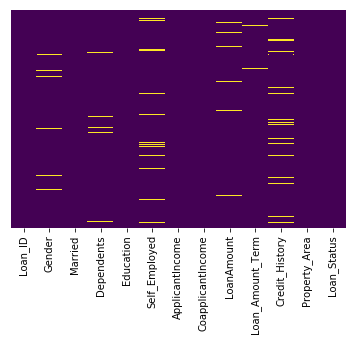

In [6]:
sns.heatmap(loans_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

### Dealing with missing data

**Variables easily circumvented**

* Gender
* Married
* Dependents
* Self-Employed

Then let´s see the possible relations between these features and being conceived or not a loan.

In [7]:
loans_train['Gender'] = np.where(loans_train.Gender.isnull(), 'Not_Informed', loans_train.Gender)

In [8]:
yes = len(loans_train[loans_train.Loan_Status == 'Y'].Loan_Status)/len(loans_train.Loan_Status)
no = len(loans_train[loans_train.Loan_Status == 'N'].Loan_Status)/len(loans_train.Loan_Status)

print('Yes - '+str(round(yes,2))+'%')
print('No - '+str(round(no,2))+'%')

Yes - 0.69%
No - 0.31%


We can see at first that the classes are kind of imbalanced on this dataset. Our target class (No) is subrepresented

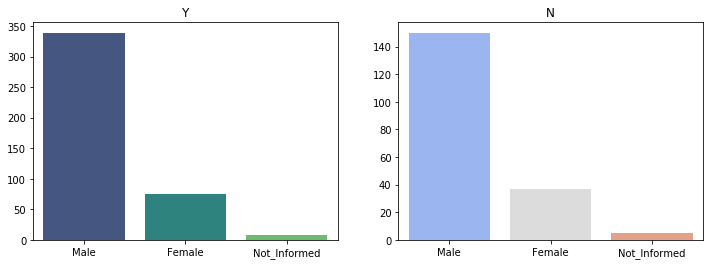

In [9]:
fig = plt.figure(figsize=(12,4)) 

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Y")
ax2 = fig.add_subplot(1,2,2)
ax2.set_title("N")

sns.barplot(x = loans_train[loans_train.Loan_Status == 'Y'].Gender.value_counts().index, 
            y = loans_train[loans_train.Loan_Status == 'Y'].Gender.value_counts().values,
            ax = ax1, palette='viridis')

sns.barplot(x = loans_train[loans_train.Loan_Status == 'N'].Gender.value_counts().index, 
            y = loans_train[loans_train.Loan_Status == 'N'].Gender.value_counts().values,
            ax = ax2,  palette='coolwarm')

plt.show()

In [10]:
loans_train['Married'] = np.where(loans_train.Married.isnull(), 'Not_Informed', loans_train.Married)

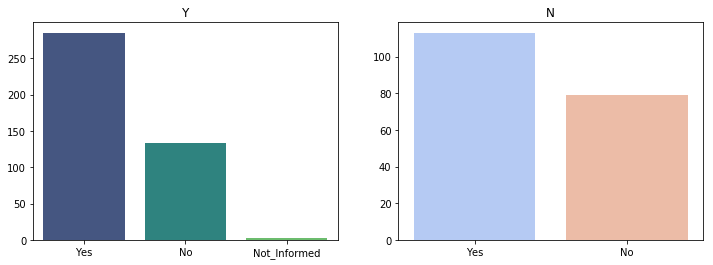

In [11]:
fig = plt.figure(figsize=(12,4)) 

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Y")
ax2 = fig.add_subplot(1,2,2)
ax2.set_title("N")

sns.barplot(x = loans_train[loans_train.Loan_Status == 'Y'].Married.value_counts().index, 
            y = loans_train[loans_train.Loan_Status == 'Y'].Married.value_counts().values,
            ax = ax1, palette='viridis')

sns.barplot(x = loans_train[loans_train.Loan_Status == 'N'].Married.value_counts().index, 
            y = loans_train[loans_train.Loan_Status == 'N'].Married.value_counts().values,
            ax = ax2,  palette='coolwarm')

plt.show()

In [12]:
loans_train['Dependents'] = np.where(loans_train.Dependents.isnull(), 'Not_Informed', loans_train.Dependents)

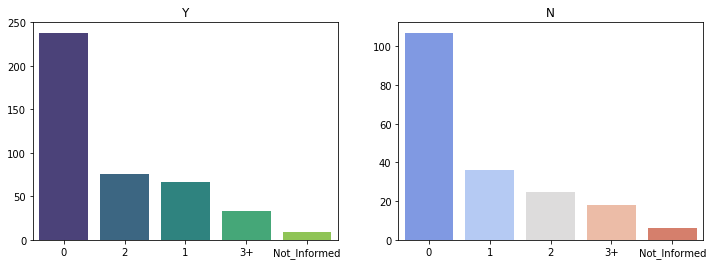

In [13]:
fig = plt.figure(figsize=(12,4)) 

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Y")
ax2 = fig.add_subplot(1,2,2)
ax2.set_title("N")

sns.barplot(x = loans_train[loans_train.Loan_Status == 'Y'].Dependents.value_counts().index, 
            y = loans_train[loans_train.Loan_Status == 'Y'].Dependents.value_counts().values,
            ax = ax1, palette='viridis')

sns.barplot(x = loans_train[loans_train.Loan_Status == 'N'].Dependents.value_counts().index, 
            y = loans_train[loans_train.Loan_Status == 'N'].Dependents.value_counts().values,
            ax = ax2,  palette='coolwarm')

plt.show()

In [14]:
loans_train['Education'] = np.where(loans_train.Education.isnull(), 'Not_Informed', loans_train.Education)

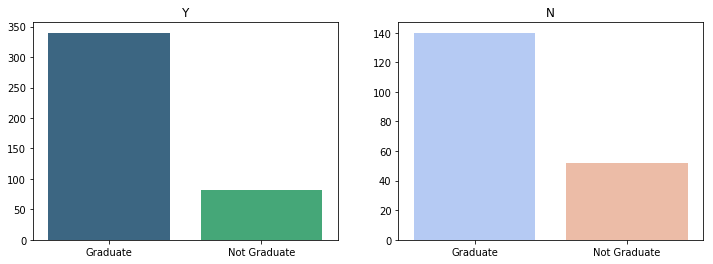

In [15]:
fig = plt.figure(figsize=(12,4)) 

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Y")
ax2 = fig.add_subplot(1,2,2)
ax2.set_title("N")

sns.barplot(x = loans_train[loans_train.Loan_Status == 'Y'].Education.value_counts().index, 
            y = loans_train[loans_train.Loan_Status == 'Y'].Education.value_counts().values,
            ax = ax1, palette='viridis')

sns.barplot(x = loans_train[loans_train.Loan_Status == 'N'].Education.value_counts().index, 
            y = loans_train[loans_train.Loan_Status == 'N'].Education.value_counts().values,
            ax = ax2,  palette='coolwarm')

plt.show()

In [16]:
loans_train['Self_Employed'] = np.where(loans_train.Self_Employed.isnull(), 'Not_Informed', loans_train.Self_Employed)

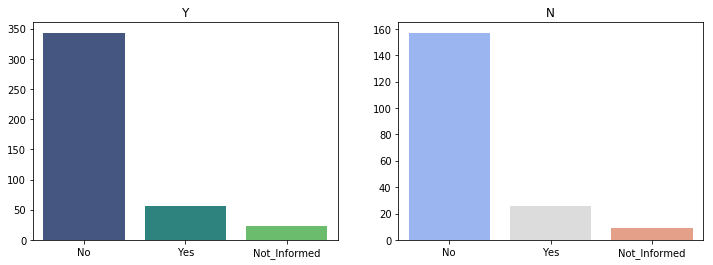

In [17]:
fig = plt.figure(figsize=(12,4)) 

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Y")
ax2 = fig.add_subplot(1,2,2)
ax2.set_title("N")

sns.barplot(x = loans_train[loans_train.Loan_Status == 'Y'].Self_Employed.value_counts().index, 
            y = loans_train[loans_train.Loan_Status == 'Y'].Self_Employed.value_counts().values,
            ax = ax1, palette='viridis')

sns.barplot(x = loans_train[loans_train.Loan_Status == 'N'].Self_Employed.value_counts().index, 
            y = loans_train[loans_train.Loan_Status == 'N'].Self_Employed.value_counts().values,
            ax = ax2,  palette='coolwarm')

plt.show()

**Variáveis Numéricas**


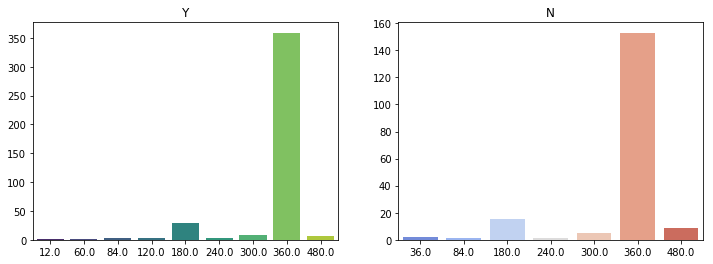

In [18]:
fig = plt.figure(figsize=(12,4)) 

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Y")
ax2 = fig.add_subplot(1,2,2)
ax2.set_title("N")

sns.barplot(x = loans_train[loans_train.Loan_Status == 'Y'].Loan_Amount_Term.value_counts().index, 
            y = loans_train[loans_train.Loan_Status == 'Y'].Loan_Amount_Term.value_counts().values,
            ax = ax1, palette='viridis')

sns.barplot(x = loans_train[loans_train.Loan_Status == 'N'].Loan_Amount_Term.value_counts().index, 
            y = loans_train[loans_train.Loan_Status == 'N'].Loan_Amount_Term.value_counts().values,
            ax = ax2,  palette='coolwarm')

plt.show()

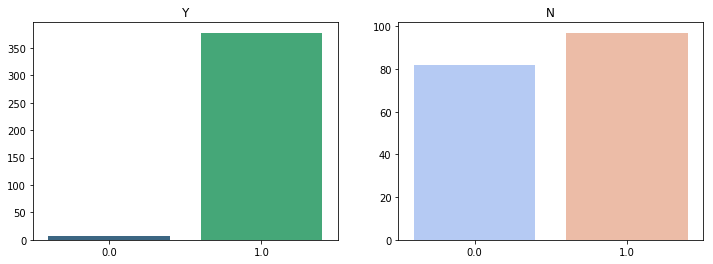

In [19]:
fig = plt.figure(figsize=(12,4)) 

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Y")
ax2 = fig.add_subplot(1,2,2)
ax2.set_title("N")

sns.barplot(x = loans_train[loans_train.Loan_Status == 'Y'].Credit_History.value_counts().index, 
            y = loans_train[loans_train.Loan_Status == 'Y'].Credit_History.value_counts().values,
            ax = ax1, palette='viridis')

sns.barplot(x = loans_train[loans_train.Loan_Status == 'N'].Credit_History.value_counts().index, 
            y = loans_train[loans_train.Loan_Status == 'N'].Credit_History.value_counts().values,
            ax = ax2,  palette='coolwarm')

plt.show()

**This is actually a categorical feature. In that case, NaN values are equivalent to zero, since zero represents lack of information about your credit history**

In [20]:
loans_train['Credit_History'] = np.where(loans_train.Credit_History.isnull(), 0, loans_train.Credit_History)

**Loan Amount**

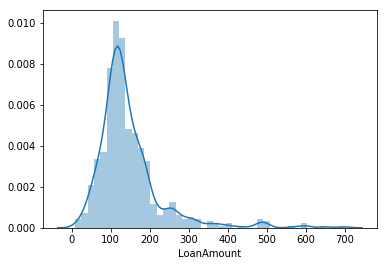

In [21]:
sns.distplot(loans_train.LoanAmount.dropna())
plt.show()

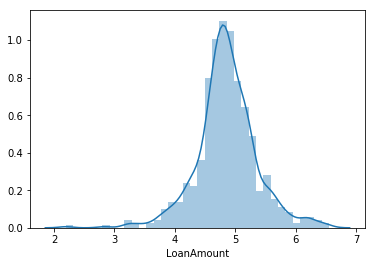

In [22]:
sns.distplot(np.log(loans_train.LoanAmount.dropna()))
plt.show()

**Let´s check if is there any relation between the variables "Loan_Amount" and the others**

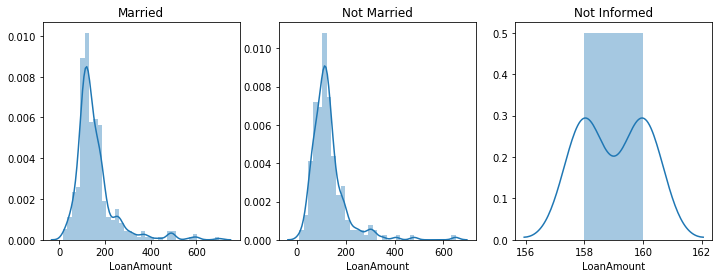

In [23]:
fig = plt.figure(figsize=(12,4)) 

ax1 = fig.add_subplot(1,3,1)
ax1.set_title("Married")
ax2 = fig.add_subplot(1,3,2)
ax2.set_title("Not Married")
ax3 = fig.add_subplot(1,3,3)
ax3.set_title("Not Informed")

sns.distplot(loans_train[loans_train.Married == 'Yes'].LoanAmount.dropna(), ax = ax1)
sns.distplot(loans_train[loans_train.Married == 'No'].LoanAmount.dropna(), ax = ax2)
sns.distplot(loans_train[loans_train.Married == 'Not_Informed'].LoanAmount.dropna(), ax = ax3)

plt.show()

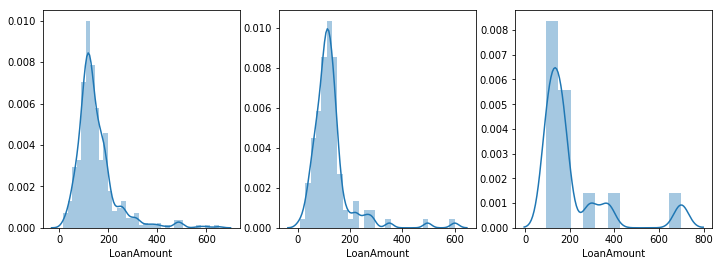

In [24]:
fig = plt.figure(figsize=(12,4)) 

ax1 = fig.add_subplot(1,3,1) 
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.distplot(loans_train[loans_train.Gender == 'Male'].LoanAmount.dropna(), ax = ax1)
sns.distplot(loans_train[loans_train.Gender == 'Female'].LoanAmount.dropna(), ax = ax2)
sns.distplot(loans_train[loans_train.Gender == 'Not_Informed'].LoanAmount.dropna(), ax = ax3)

plt.show()

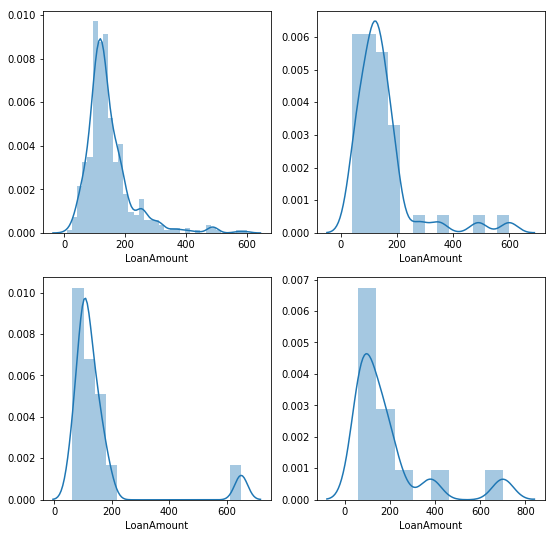

In [25]:
fig = plt.figure(figsize=(9,9)) 

ax1 = fig.add_subplot(2,2,1) 
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.distplot(loans_train[loans_train.Loan_Amount_Term == 360.0].LoanAmount.dropna(), ax = ax1)
sns.distplot(loans_train[loans_train.Loan_Amount_Term == 180.0].LoanAmount.dropna(), ax = ax2)
sns.distplot(loans_train[loans_train.Loan_Amount_Term == 480.0].LoanAmount.dropna(), ax = ax3)
sns.distplot(loans_train[loans_train.Loan_Amount_Term == 300.0].LoanAmount.dropna(), ax = ax4)

plt.show()

In [26]:
loans_train.LoanAmount.mean()

146.41216216216216

In [27]:
loans_train.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [28]:
loans_train['LoanAmount'] = np.where(loans_train.LoanAmount.isnull() , 
                                     loans_train.LoanAmount.mean(), 
                                     loans_train.LoanAmount)

loans_train['Loan_Amount_Term'] = np.where(loans_train.Loan_Amount_Term.isnull() , 
                                           loans_train.Loan_Amount_Term.value_counts().index[0], 
                                           loans_train.Loan_Amount_Term)

In [29]:
loans_train['LAmount_Log'] = np.log(loans_train.LoanAmount)

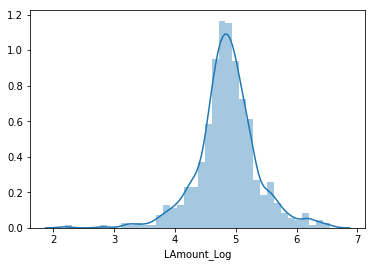

In [30]:
sns.distplot(loans_train.LAmount_Log)
plt.show()

**Income**

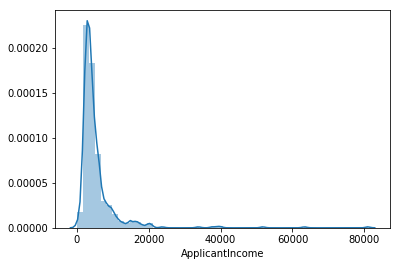

In [31]:
sns.distplot(loans_train.ApplicantIncome)
plt.show()

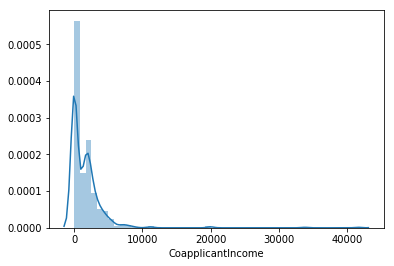

In [32]:
sns.distplot(loans_train.CoapplicantIncome)
plt.show()

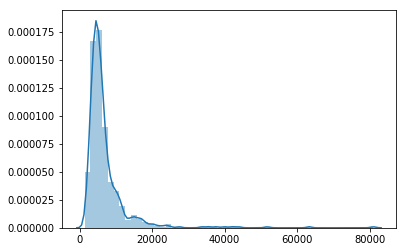

In [33]:
sns.distplot(loans_train.ApplicantIncome + loans_train.CoapplicantIncome)
plt.show()

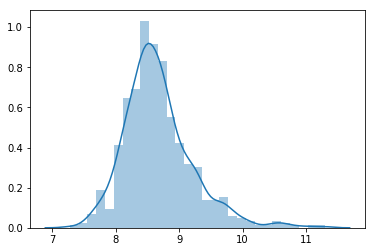

In [34]:
sns.distplot(np.log(loans_train.ApplicantIncome + loans_train.CoapplicantIncome))
plt.show()

In [35]:
loans_train['AIncome_log'] = np.log(loans_train.ApplicantIncome + loans_train.CoapplicantIncome)

**Property Area**

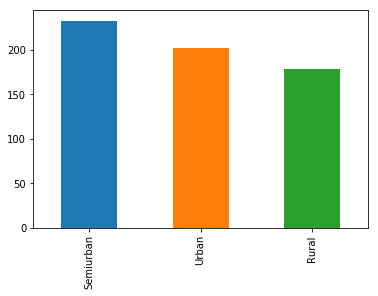

In [36]:
loans_train.Property_Area.value_counts().plot.bar()
plt.show()

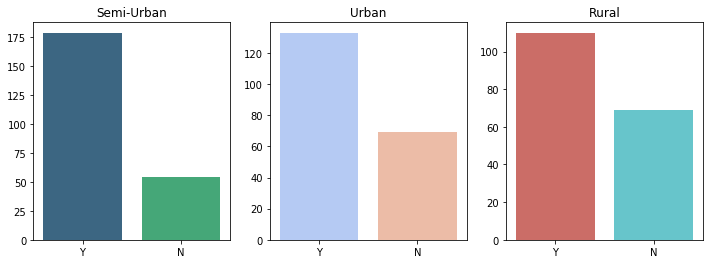

In [37]:
fig = plt.figure(figsize=(12,4)) 

ax1 = fig.add_subplot(1,3,1)
ax1.set_title("Semi-Urban")
ax2 = fig.add_subplot(1,3,2)
ax2.set_title("Urban")
ax3 = fig.add_subplot(1,3,3)
ax3.set_title("Rural")

sns.barplot(x = loans_train[loans_train.Property_Area == 'Semiurban'].Loan_Status.value_counts().index, 
            y = loans_train[loans_train.Property_Area == 'Semiurban'].Loan_Status.value_counts().values,
            ax = ax1, palette='viridis')

sns.barplot(x = loans_train[loans_train.Property_Area == 'Urban'].Loan_Status.value_counts().index, 
            y = loans_train[loans_train.Property_Area == 'Urban'].Loan_Status.value_counts().values,
            ax = ax2,  palette='coolwarm')

sns.barplot(x = loans_train[loans_train.Property_Area == 'Rural'].Loan_Status.value_counts().index, 
            y = loans_train[loans_train.Property_Area == 'Rural'].Loan_Status.value_counts().values,
            ax = ax3,  palette='hls')

plt.show()

In [38]:
loans_train['Loan_ID'] = loans_train.Loan_ID.astype('category')
loans_train['Gender'] = loans_train.Gender.astype('category')
loans_train['Married'] = loans_train.Married.astype('category')
loans_train['Dependents'] = loans_train.Dependents.astype('category')
loans_train['Education'] = loans_train.Education.astype('category')
loans_train['Self_Employed'] = loans_train.Self_Employed.astype('category')
loans_train['Loan_Amount_Term'] = loans_train.Loan_Amount_Term.astype('category')
loans_train['Credit_History'] = loans_train.Credit_History.astype('category')
loans_train['Property_Area'] = loans_train.Property_Area.astype('category')
loans_train['Loan_Status'] = loans_train.Loan_Status.astype('category')

## Train Test Split

In [39]:
gender = pd.get_dummies(loans_train.Gender ,drop_first=True)
married = pd.get_dummies(loans_train.Married ,drop_first=True)
dependents = pd.get_dummies(loans_train.Dependents ,drop_first=True)
education = pd.get_dummies(loans_train.Education ,drop_first=True)
self_e = pd.get_dummies(loans_train.Self_Employed ,drop_first=True)
laterm = pd.get_dummies(loans_train.Loan_Amount_Term ,drop_first=True)
credit_h = pd.get_dummies(loans_train.Credit_History ,drop_first=True)
prop = pd.get_dummies(loans_train.Property_Area ,drop_first=True)

In [40]:
df = pd.concat([loans_train.drop(['Loan_ID','Gender','Married','Dependents','ApplicantIncome','CoapplicantIncome',
                                 'Education','Self_Employed','Loan_Amount_Term','LoanAmount',
                                 'Credit_History','Property_Area'], axis=1), 
               married, education, 
               credit_h, prop], axis=1)

In [41]:
df.rename({'Yes': 'Married', 1.0: 'Credit_History'}, axis=1, inplace=True)

In [42]:
df.head()

,Loan_Status,LAmount_Log,AIncome_log,Not_Informed,Married,Not Graduate,Credit_History,Semiurban,Urban
0,Y,4.986426,8.674026,0,0,0,1,0,1
1,N,4.852030,8.714568,0,1,0,1,0,0
2,Y,4.189655,8.006368,0,1,0,1,0,1
3,Y,4.787492,8.505323,0,1,1,1,0,1
4,Y,4.948760,8.699515,0,0,0,1,0,1


In [43]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
Loan_Status       614 non-null category
LAmount_Log       614 non-null float64
AIncome_log       614 non-null float64
Not_Informed      614 non-null uint8
Married           614 non-null uint8
Not Graduate      614 non-null uint8
Credit_History    614 non-null uint8
Semiurban         614 non-null uint8
Urban             614 non-null uint8
dtypes: category(1), float64(2), uint8(6)
memory usage: 14.1 KB


In [44]:
df['LAmount_Log'] = df.LAmount_Log.astype('float16')
df['AIncome_log'] = df.AIncome_log.astype('float16')

## Creating a General Classifier

In [45]:
def myClassifier(model, data, predictor, outcome, results = None):
    from sklearn import metrics
    from sklearn.model_selection import StratifiedKFold
    from sklearn.metrics import classification_report
    
    #Fit the model
    model.fit(data[predictors],data[outcome])
    
    #Making Predictions
    predictions = model.predict(data[predictors])
    
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy : %s" % "{0:.2%}".format(accuracy))
    
    #Perform k-fold cross-validation with 5 folds
    skf = StratifiedKFold(n_splits=5, shuffle=True)
    error = []
    for train, test in skf.split(data[predictors], data[outcome]):
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print("Cross-Validation Score : %s" % "{0:.2%} \n".format(np.mean(error)))

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome])
    pred = model.predict(data[predictors])
    print(classification_report(data[outcome], pred))
    
    if results is None:
        return
    else:
        return model.predict(results[predictors])

## Building a Logistic Regression model

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
outcome = 'Loan_Status'
logmodel = LogisticRegression()
predictors = ['Credit_History', 'AIncome_log']

In [48]:
myClassifier(logmodel, df, predictors, outcome)

Accuracy : 77.04%
Cross-Validation Score : 77.04% 

             precision    recall  f1-score   support

          N       0.68      0.49      0.57       192
          Y       0.80      0.90      0.84       422

avg / total       0.76      0.77      0.76       614



## Training the Decision Tree Model

In [49]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [50]:
outcome = 'Loan_Status'
treemodel = DecisionTreeClassifier()
predictors = ['Credit_History', 'AIncome_log']

In [51]:
myClassifier(treemodel, df, predictors, outcome)

Accuracy : 85.99%
Cross-Validation Score : 65.47% 

             precision    recall  f1-score   support

          N       0.78      0.78      0.78       192
          Y       0.90      0.90      0.90       422

avg / total       0.86      0.86      0.86       614



Let´s include more predictors

In [52]:
treemodel = DecisionTreeClassifier()
outcome = 'Loan_Status'
predictors = ['Credit_History', 'AIncome_log', 'Married', 'Semiurban', 'Not Graduate']

In [53]:
myClassifier(treemodel, df, predictors, outcome)

Accuracy : 95.11%
Cross-Validation Score : 65.46% 

             precision    recall  f1-score   support

          N       0.87      0.99      0.93       192
          Y       0.99      0.93      0.96       422

avg / total       0.96      0.95      0.95       614

